# Combine the datasets from both runs? 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [17]:
wd = '/home/lfloerl/Compare-Mock-Communities'
%cd $wd 

/home/lfloerl/Compare-Mock-Communities


In [34]:
bac_LP1 = pd.read_csv('Relative_frequencies/bac_LP1.csv')
bac_LP2 = pd.read_csv('Relative_frequencies/bac_LP2.csv')

fun_LP1 = pd.read_csv('Relative_frequencies/fun_LP1.csv')
fun_LP2 = pd.read_csv('Relative_frequencies/fun_LP2.csv')

# 16S

In [134]:
bac_merged = pd.merge(bac_LP1, bac_LP2, how='outer')
bac_merged = bac_merged.set_index('index')

taxa_of_interest = ['d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella',
                    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus',
                    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus',
                    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria',
                    'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas',
                    'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__',
                    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus',
                    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus']

rename_dict = {
    'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella' : 'g__Escherichia-Shigella',
    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus' : 'g__Enterococcus',
    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus' : 'g__Lactobacillus',
    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria' : 'g__Listeria',
    'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas' : 'g__Pseudomonas',
    'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__' : 'f__Enterobacteriaceae',
    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus' : 'g__Bacillus',
    'd__Bacteria;p__Firmicutes;c__Bacilli;o__Staphylococcales;f__Staphylococcaceae;g__Staphylococcus' : 'g__Staphylococcus'
    }

# rename the taxa of interest
bac_merged = bac_merged.rename(columns=rename_dict)
# Sum up all columns that are not in the taxa_of_interest and add as 'Other'
bac_merged['Other'] = bac_merged.drop(columns=rename_dict.values()).sum(axis=1)
# Drop the original non-interest columns (already summed in 'Other')
bac_merged = bac_merged[rename_dict.values()].join(bac_merged['Other'])

# Renaming the index by removing the prefix
bac_merged.index = bac_merged.index.str.extract(r'(LP.*)')[0]
bac_merged.index = bac_merged.index.str.replace('LP1', 'NextSeq2000').str.replace('LP2', 'NovaSeq6000')

# Create a new row for the reference Zymo Mock community 
new_row = {'g__Escherichia-Shigella': 12.5, 'g__Enterococcus': 12.5, 'g__Lactobacillus': 12.5, 
           'g__Listeria': 12.5, 'g__Pseudomonas': 12.5, 'f__Enterobacteriaceae': 12.5, 
           'g__Bacillus': 12.5, 'g__Staphylococcus': 12.5, 'Other': 0}
bac_merged.loc['Zymo_Mock'] = new_row

# Calculate relative frequencies
bac_relative_freq = bac_merged.div(bac_merged.sum(axis=1), axis=0) * 100

# drop this row as it has quite some contamoination still
bac_relative_freq = bac_relative_freq.drop('NextSeq2000-16S-0777')

#bac_merged.to_csv('Relative_frequencies/bac_merged.csv')

/scratch/lfloerl/tmpdata/ipykernel_1297972/3322127652.py:27: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  bac_merged['Other'] = bac_merged.drop(columns=rename_dict.values()).sum(axis=1)


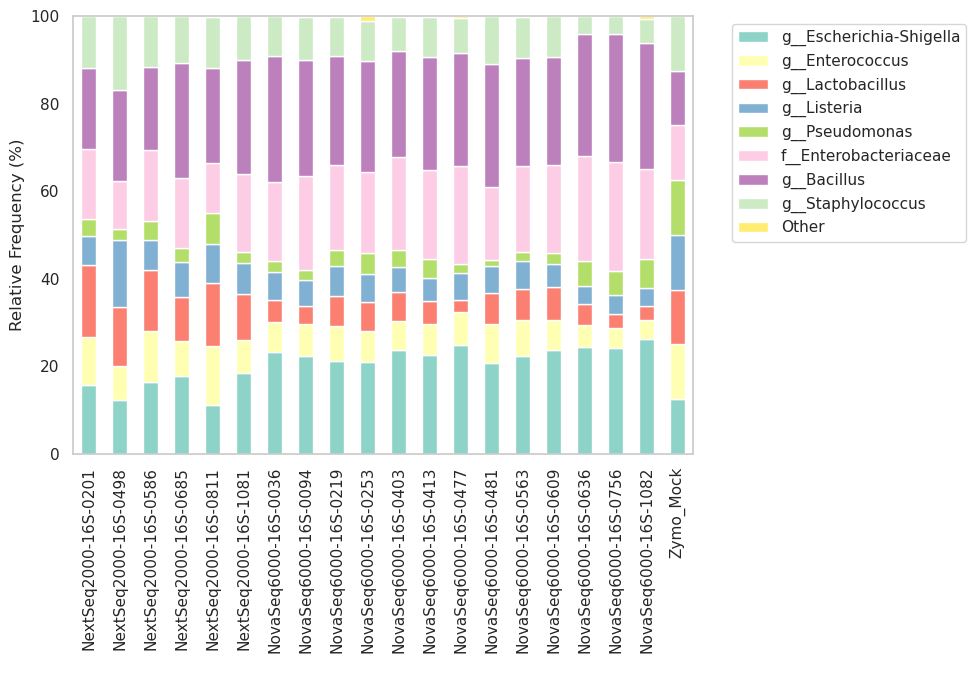

In [135]:
# Plotting the stacked barplot with a white background
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting the stacked barplot
bac_relative_freq.plot(kind='bar', stacked=True, ax=ax, cmap='Set3')

# Customizing the plot
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Remove grid lines
ax.set_ylim(0, 100)  # Set y-axis scale to end at 100

# Set the labels and title
ax.set_ylabel('Relative Frequency (%)')
ax.set_xlabel(' ')

# Show the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [119]:
# could add md?
#bac_md_1 = pd.read_csv('/home/lfloerl/Compare-Mock-Communities/Metadata/NovaSeq6000_bac_metadata.tsv', sep='\t')
#bac_md_2 = pd.read_csv('/home/lfloerl/RxCS/Metadata/16S_metadata.tsv', sep="\t")


# ITS

In [129]:
fun_merged = pd.merge(fun_LP1, fun_LP2, how='outer')
fun_merged = fun_merged.set_index('index')
taxa_of_interest = ['k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces',
                    'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus']

rename_dict = {'k__Fungi;p__Ascomycota;c__Saccharomycetes;o__Saccharomycetales;f__Saccharomycetaceae;g__Saccharomyces' : 'g__Saccharomyces',
            'k__Fungi;p__Basidiomycota;c__Tremellomycetes;o__Tremellales;f__Tremellaceae;g__Cryptococcus' : 'g__Cryptococcus'}

# rename the taxa of interest
fun_merged = fun_merged.rename(columns=rename_dict)
# Sum up all columns that are not in the taxa_of_interest and add as 'Other'
fun_merged['Other'] = fun_merged.drop(columns=rename_dict.values()).sum(axis=1)
# Drop the original non-interest columns (already summed in 'Other')
fun_merged = fun_merged[rename_dict.values()].join(fun_merged['Other'])

# renaming the index!
fun_merged.index = fun_merged.index.str.extract(r'(LP.*)')[0]
fun_merged.index = fun_merged.index.str.replace('LP1', 'NextSeq2000').str.replace('LP2', 'NovaSeq6000')

# Create a new row for the reference Zymo Mock community 
new_row = {'g__Saccharomyces':0.5, 'g__Cryptococcus':0.5, 'Other': 0}
fun_merged.loc['Zymo_Mock'] = new_row

# Calculate relative frequencies
fun_relative_freq = fun_merged.div(fun_merged.sum(axis=1), axis=0) * 100

# drop this row as it has quite some contamoination still
fun_relative_freq = fun_relative_freq.drop('NovaSeq6000-ITS-0094')

#bac_merged.to_csv('Relative_frequencies/bac_merged.csv')

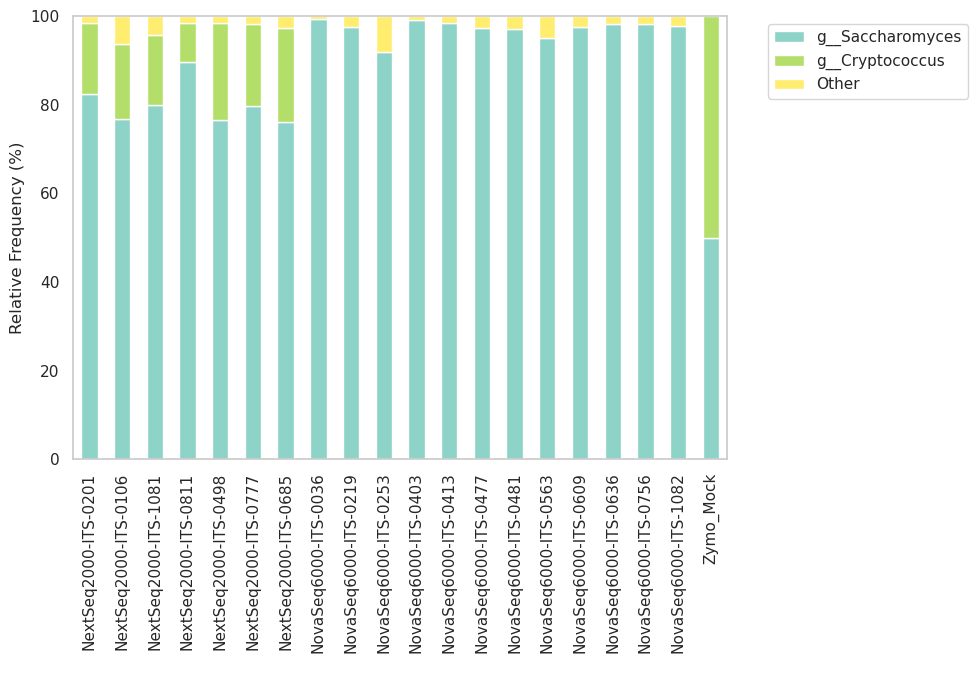

In [131]:
# Plotting the stacked barplot with a white background
fig, ax = plt.subplots(figsize=(10, 7))

# Plotting the stacked barplot
fun_relative_freq.plot(kind='bar', stacked=True, ax=ax, cmap='Set3')

# Customizing the plot
ax.set_facecolor('white')  # Set background to white
ax.grid(False)  # Remove grid lines
ax.set_ylim(0, 100)  # Set y-axis scale to end at 100

# Set the labels and title
ax.set_ylabel('Relative Frequency (%)')
ax.set_xlabel(' ')

# Show the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# could add md?
#bac_md_1 = pd.read_csv('/home/lfloerl/Compare-Mock-Communities/Metadata/NovaSeq6000_bac_metadata.tsv', sep='\t')
#bac_md_2 = pd.read_csv('/home/lfloerl/RxCS/Metadata/16S_metadata.tsv', sep="\t")


## This does not work 

In [21]:
bac_LP1.head()

,index,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Devosiaceae;g__Devosia,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__,d__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus,d__Bacteria;__;__;__;__;__,...,GT,Block,Block_no,Year_Cat,GT_numb,Average_Brix,Average_Cluster_Weight,Genotype,Berry_Color,control
0,346832_105-LP1-16S-0201,249863.0,0.0,176384.0,259334.0,105806.0,62030.0,254065.0,296717.0,11.0,...,NaN,NaN,NaN,Yearnan,NaN,22.200000,85.333333,NaN,NaN,pos_ctrl
1,346832_357-LP1-16S-0498,52205.0,0.0,33266.0,57713.0,64985.0,10986.0,47023.0,88453.0,0.0,...,NaN,NaN,NaN,Yearnan,NaN,23.600000,NaN,NaN,NaN,pos_ctrl
2,346832_440-LP1-16S-0586,133983.0,0.0,97182.0,115045.0,56295.0,34744.0,134410.0,154754.0,3.0,...,NaN,NaN,NaN,Yearnan,NaN,21.833333,116.333333,NaN,NaN,pos_ctrl
3,346832_531-LP1-16S-0685,40363.0,0.0,18148.0,22944.0,17810.0,7525.0,36416.0,59720.0,0.0,...,NaN,NaN,NaN,Yearnan,NaN,23.433333,190.333333,NaN,NaN,pos_ctrl
4,346832_617-LP1-16S-0777,90.0,0.0,71.0,83.0,62.0,20.0,93.0,108.0,0.0,...,NaN,NaN,NaN,Yearnan,NaN,24.100000,116.666667,NaN,NaN,pos_ctrl


Unique Categories: ['d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__Escherichia-Shigella'
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Devosiaceae;g__Devosia'
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Enterococcaceae;g__Enterococcus'
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Lactobacillaceae;g__Lactobacillus'
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Listeriaceae;g__Listeria'
 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Pseudomonadaceae;g__Pseudomonas'
 'd__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;__'
 'd__Bacteria;p__Firmicutes;c__Bacilli;o__Bacillales;f__Bacillaceae;g__Bacillus'
 'd__Bacteria;__;__;__;__;__'
 'd__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Beijerinckiaceae;g__1174-901-12'
 'd__Bacteria;p__Acidobacteriota;c__Vicinamibacteria;o__V

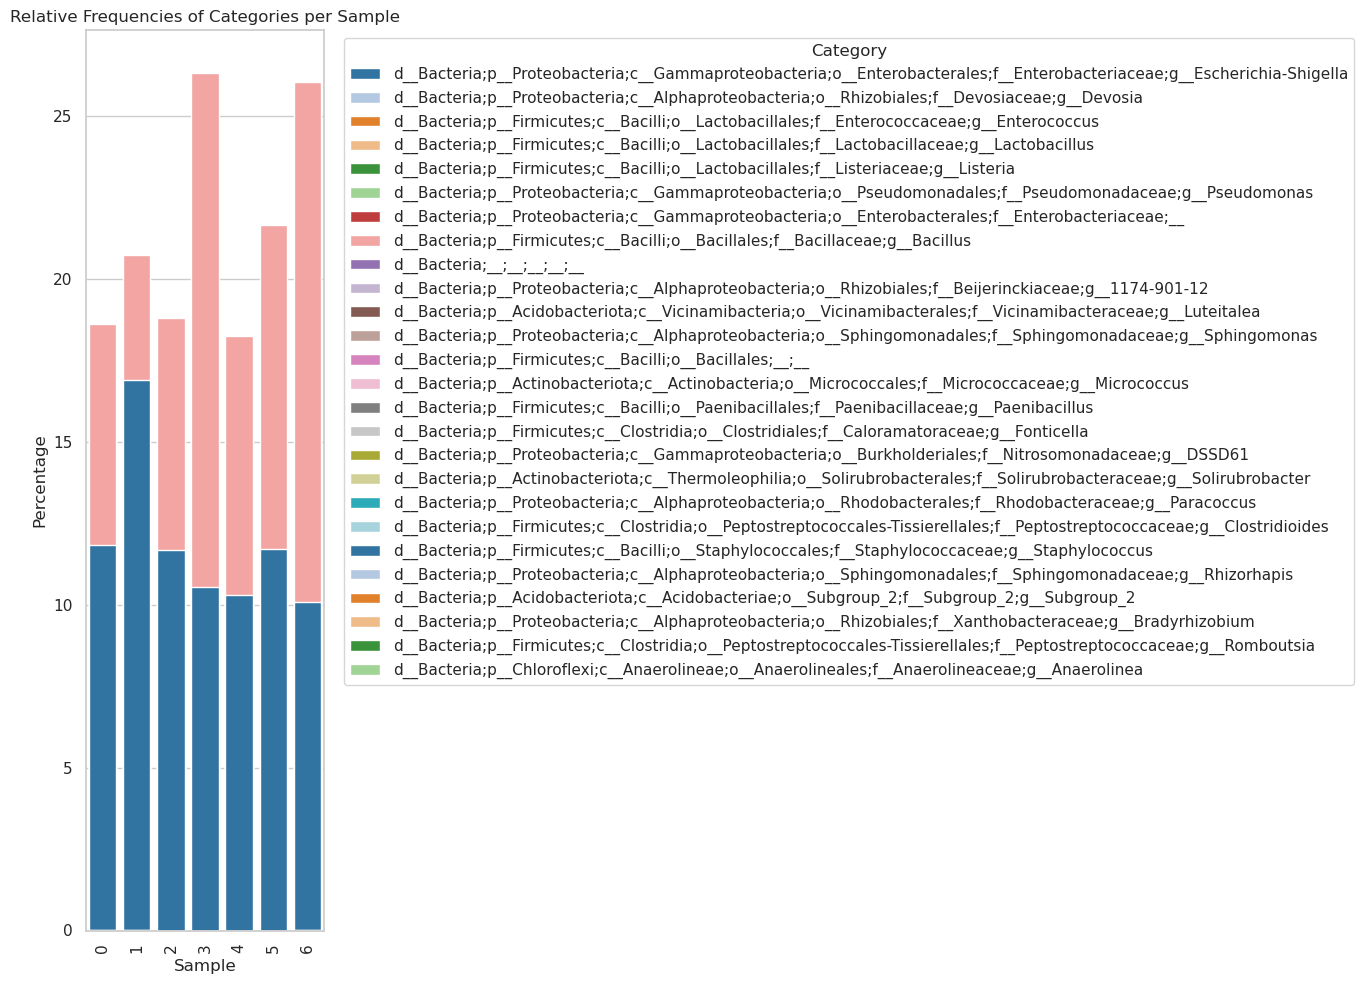

In [32]:

# 1. Filter columns starting with 'd__'
d_columns = [col for col in bac_LP1.columns if col.startswith('d__')]
df_filtered = bac_LP1[d_columns]

# Calculate relative frequencies
df_relative_freq = df_filtered.div(df_filtered.sum(axis=1), axis=0) * 100

# Reset index to keep 'Sample' as a column for plotting
df_relative_freq = df_relative_freq.reset_index()
df_relative_freq_melted = df_relative_freq.melt(id_vars='Sample', var_name='Category', value_name='Percentage')

# Set the figure size
plt.figure(figsize=(14, 10))  # Adjust size if necessary

# Create the stacked bar plot
sns.barplot(data=df_relative_freq_melted, x='Sample', y='Percentage', hue='Category', palette='tab20', dodge=False)

# Rotate x labels for better readability
plt.xticks(rotation=90)

# Add labels and title
plt.xlabel('Sample')
plt.ylabel('Percentage')
plt.title('Relative Frequencies of Categories per Sample')

# Add legend
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()  # Adjust layout to fit legend
plt.show()